# Raw Data exploration

## Set-up and data import

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="whitegrid")
import re
import text_to_x as ttx

You should consider upgrading via the '/Users/anitakurm/anaconda3/envs/text_to_x/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
data = pd.read_csv("data/china-user-tweets-2020-08-06.csv")

## Getting to know the dataframe

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           31931 non-null  int64  
 1   time                         31931 non-null  int64  
 2   created_at                   31931 non-null  object 
 3   from_user_name               31931 non-null  object 
 4   text                         31931 non-null  object 
 5   filter_level                 31931 non-null  object 
 6   possibly_sensitive           26113 non-null  float64
 7   withheld_copyright           0 non-null      float64
 8   withheld_scope               0 non-null      float64
 9   truncated                    0 non-null      float64
 10  retweet_count                31931 non-null  int64  
 11  favorite_count               31931 non-null  int64  
 12  lang                         31931 non-null  object 
 13  to_user_name    

In [26]:
# drop empty columns
data_clean = data.dropna(axis=1, how='all')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           31931 non-null  int64  
 1   time                         31931 non-null  int64  
 2   created_at                   31931 non-null  object 
 3   from_user_name               31931 non-null  object 
 4   text                         31931 non-null  object 
 5   filter_level                 31931 non-null  object 
 6   possibly_sensitive           26113 non-null  float64
 7   retweet_count                31931 non-null  int64  
 8   favorite_count               31931 non-null  int64  
 9   lang                         31931 non-null  object 
 10  to_user_name                 1752 non-null   object 
 11  in_reply_to_status_id        1703 non-null   float64
 12  quoted_status_id             1761 non-null   float64
 13  source          

In [27]:
data_clean.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,...,media_id,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,0,0,en,...,1262697877803077632,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,0,0,en,...,1262704822089912321,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,0,0,en,...,1262747210246049794,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,0,0,en,...,1262742771380543490,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN


In [43]:
# extract interesting columns
print(data_clean.columns)
cool_columns = ["id","created_at", "from_user_name", "text", "lang",
                "possibly_sensitive", "retweet_count",
                'favorite_count', 'to_user_name', 'in_reply_to_status_id',
                'from_user_verified', 'from_user_description',  
                'from_user_followercount','from_user_friendcount', 
                'from_user_favourites_count', 'media_type', 'mentions', 
                'hashtags']
data_clean2 = data_clean[cool_columns]
data_clean2.head()

Index(['id', 'created_at', 'from_user_name', 'text', 'lang', 'filter_level',
       'possibly_sensitive', 'retweet_count', 'favorite_count', 'to_user_name',
       'in_reply_to_status_id', 'from_user_verified', 'from_user_description',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'media_type', 'mentions', 'hashtags'],
      dtype='object')


,id,created_at,from_user_name,text,lang,possibly_sensitive,retweet_count,favorite_count,to_user_name,in_reply_to_status_id,from_user_verified,from_user_description,from_user_followercount,from_user_friendcount,from_user_favourites_count,media_type,mentions,hashtags
0,1262699470946516992,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14658,1842,2755,photo,WHO,NaN
1,1262705175489363968,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14659,1842,2755,photo,NaN,NaN
2,1262747333747343366,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,en,0.0,0,0,NaN,NaN,1,Mission of the People's Republic of China to t...,14665,1842,2755,photo,NaN,StrongerTogether
3,1262753525655719938,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,en,0.0,0,0,NaN,NaN,1,"Spokesman & DDG, Information Department, Forei...",621491,179167,121496,NaN,SpokespersonCHN,NaN
4,1262753542101581830,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,en,0.0,0,0,NaN,NaN,1,"Spokesman & DDG, Information Department, Forei...",621491,179167,121497,photo,SpokespersonCHN,NaN


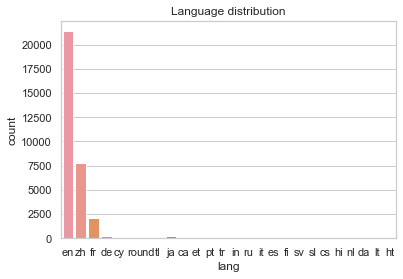

In [44]:
ax = sns.countplot(x="lang", data=data_clean2).set_title('Language distribution')

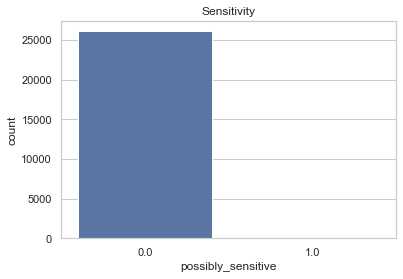

In [45]:
ax = sns.countplot(x="possibly_sensitive", data=data_clean2).set_title('Sensitivity')

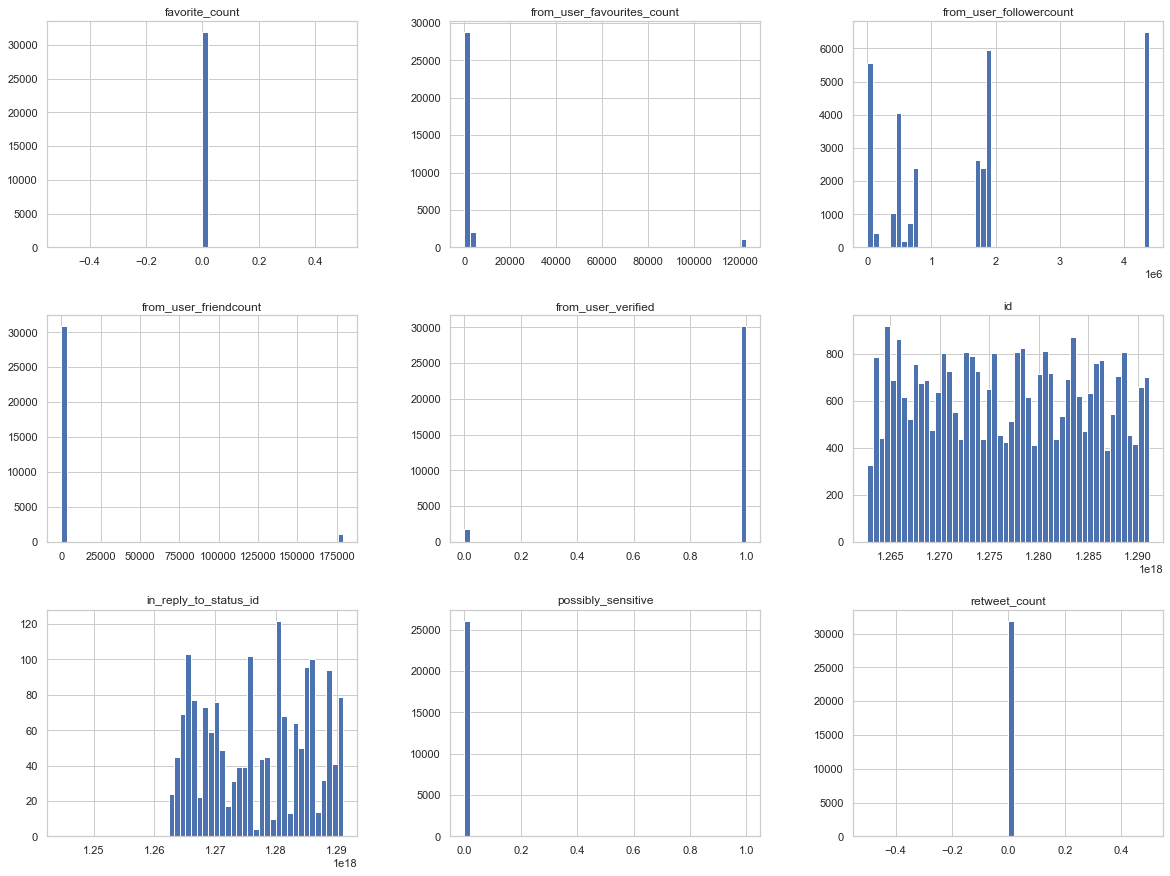

In [48]:
data_clean2.hist(bins=50, figsize=(20,15))
plt.show()

## Text analysis

### Reproducing TextToX pipeline from covid_19 workflow

In [20]:
"""
This script performs tokenization, extraction of lemmas, pos-tagging
and ner-tagging on Data Commando Twitter data.
"""
import os
import time
import re
#import ndjson
import multiprocessing as mp
from functools import partial
import pandas as pd
#import text_to_x as ttx
from text_to_x.utils import detect_lang_polyglot, add_def_args
#stopword = stopwords.words(‘english’)

def chunks(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def to_ndjson(df):
    if df.empty:
        return []
    res = []
    for i, row in df.iterrows():
        lang = row['lang']
        d = {'created_at': row['created_at'],
             'id': row['id'],
             'id_str': str(row['id']),
             'text': row['text'],
             'retweet_count': row['retweet_count'],
             'favorite_count': row['favorite_count'],
             'lang': lang,
             "follower_count": row['from_user_followercount']}
        res.append(d)
    return res


def preprocess(lang, data):
    lang_posts = [d for d in data if d['lang'] == lang]
    # make placeholders to accumulate processing time
    time_text_extract = 0
    time_stanza = 0
    skipped_counter = 0
    chunk_n = 0
    # chunking - OUTER to avoid memory errors
    chunk_id = 0
    max_length = 20000
    chunked_posts = chunks(lang_posts, max_length)
    big_res = []
    for ch in chunked_posts:
        res = []
        ch = [post for post in ch]
        chunk_id += 1

        # chunking - INNER to handle stanza errors
        chunk_size = 500
        chunked_chunk = chunks(ch, chunk_size)
        for c in chunked_chunk:
            start = time.time()
            chunk_n += 1
            c = [post for post in c]
            texts = [post['text'] for post in c]

            time_text_extract_c = time.time() - start
            time_text_extract += time_text_extract_c

            # preprocess and tokenize using ttt object defined earlier
            start = time.time()
            ttt = ttx.TextToTokens(lang=lang,
                                   tokenize="stanza",
                                   lemmatize="stanza",
                                   pos="stanza",
                                   depparse="stanza",
                                   ner="stanza",
                                   silent=False)
            try:
                ttt.texts_to_tokens(texts)
            except:
                skipped_counter += 1
                continue
            ttt.twitter_format()
            dfs = ttt.get_token_dfs()
            for i, post in enumerate(c):
                post['tokens'] = dfs[i].to_dict()
            res += c
            time_stanza_c = time.time() - start
            time_stanza += time_stanza_c
        
        big_res += res
    return big_res
    
    
    
    #no_url = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    # lower = no_url.lower()
    # word_tokens = nltk.word_tokenize(lower)
    # no_stop = [word for word in word_tokens if word not in stopword]
    #dfs = ttt.texts_to_tokens(no_url)
    #ttt.twitter_format()
    #dfs = ttt.get_token_dfs()
    #return 

### English pre-processing

In [21]:
df = to_ndjson(data_clean2)
english_data = preprocess('en', df)

2020-08-08 09:52:08 INFO: Downloading default packages for language: en (English)...
2020-08-08 09:53:10 INFO: Finished downloading models and saved to /Users/anitakurm/stanza_resources.
2020-08-08 09:53:10 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 09:53:10 INFO: Use device: cpu
2020-08-08 09:53:10 INFO: Loading: tokenize
2020-08-08 09:53:10 INFO: Loading: pos
2020-08-08 09:53:11 INFO: Loading: lemma
2020-08-08 09:53:11 INFO: Loading: depparse
2020-08-08 09:53:12 INFO: Loading: ner
2020-08-08 09:53:13 INFO: Done loading processors!
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/text_to_x/TextToTokens.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

2020-08-08 10:50:46 INFO: Use device: cpu
2020-08-08 10:50:46 INFO: Loading: tokenize
2020-08-08 10:50:46 INFO: Loading: pos
2020-08-08 10:50:47 INFO: Loading: lemma
2020-08-08 10:50:47 INFO: Loading: depparse
2020-08-08 10:50:48 INFO: Loading: ner
2020-08-08 10:50:48 INFO: Done loading processors!
2020-08-08 10:55:34 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 10:55:34 INFO: Use device: cpu
2020-08-08 10:55:34 INFO: Loading: tokenize
2020-08-08 10:55:34 INFO: Loading: pos
2020-08-08 10:55:36 INFO: Loading: lemma
2020-08-08 10:55:36 INFO: Loading: depparse
2020-08-08 10:55:37 INFO: Loading: ner
2020-08-08 10:55:38 INFO: Done loading processors!
2020-08-08 11:00:24 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

2020-08-08 12:00:32 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 12:00:32 INFO: Use device: cpu
2020-08-08 12:00:32 INFO: Loading: tokenize
2020-08-08 12:00:32 INFO: Loading: pos
2020-08-08 12:00:33 INFO: Loading: lemma
2020-08-08 12:00:33 INFO: Loading: depparse
2020-08-08 12:00:35 INFO: Loading: ner
2020-08-08 12:00:35 INFO: Done loading processors!
2020-08-08 12:05:07 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 12:05:07 INFO: Use device: cpu
2020-08-08 12:05:07 INFO: Loading: tokenize
2020-08-08 12:05:07 INFO: Loading: pos
2020-08-08 12:05:08 INFO: Loading: lemma
2020-08-08 12:05:0

2020-08-08 12:59:09 INFO: Use device: cpu
2020-08-08 12:59:09 INFO: Loading: tokenize
2020-08-08 12:59:09 INFO: Loading: pos
2020-08-08 12:59:10 INFO: Loading: lemma
2020-08-08 12:59:10 INFO: Loading: depparse
2020-08-08 12:59:11 INFO: Loading: ner
2020-08-08 12:59:11 INFO: Done loading processors!
2020-08-08 13:03:31 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-08 13:03:31 INFO: Use device: cpu
2020-08-08 13:03:31 INFO: Loading: tokenize
2020-08-08 13:03:31 INFO: Loading: pos
2020-08-08 13:03:32 INFO: Loading: lemma
2020-08-08 13:03:32 INFO: Loading: depparse
2020-08-08 13:03:33 INFO: Loading: ner
2020-08-08 13:03:34 INFO: Done loading processors!
2020-08-08 13:08:03 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

In [23]:
en_df = pd.DataFrame(english_data)
en_df.head()

,created_at,id,id_str,text,retweet_count,favorite_count,lang,follower_count,tokens
0,2020-05-19 10:59:48,1262699470946516992,1262699470946516992,All parties have reached consensus on a draft ...,0,0,en,14658,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
1,2020-05-19 11:22:28,1262705175489363968,1262705175489363968,China's railway system is expected to reach 14...,0,0,en,14659,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
2,2020-05-19 14:09:59,1262747333747343366,1262747333747343366,China has exported over 50 billion masks since...,0,0,en,14665,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
3,2020-05-19 14:34:35,1262753525655719938,1262753525655719938,RT @SpokespersonCHN: Not the first time to bas...,0,0,en,621491,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
4,2020-05-19 14:34:39,1262753542101581830,1262753542101581830,RT @SpokespersonCHN: That what does not kill y...,0,0,en,621491,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."


In [25]:
# save processed df
en_df.to_csv('data/english_preprocessed.csv')


### Chinese pre-processing

In [45]:
chinese_data = preprocess('zh', df)

2020-08-09 11:02:02 INFO: "zh" is an alias for "zh-hans"
2020-08-09 11:02:02 INFO: Downloading default packages for language: zh-hans (Simplified_Chinese)...
2020-08-09 11:17:41 INFO: Finished downloading models and saved to /Users/anitakurm/stanza_resources.
2020-08-09 11:17:41 INFO: "zh" is an alias for "zh-hans"
2020-08-09 11:17:41 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package   |
-------------------------
| tokenize  | gsdsimp   |
| pos       | gsdsimp   |
| lemma     | gsdsimp   |
| depparse  | gsdsimp   |
| ner       | ontonotes |

2020-08-09 11:17:41 INFO: Use device: cpu
2020-08-09 11:17:41 INFO: Loading: tokenize
2020-08-09 11:17:41 INFO: Loading: pos
2020-08-09 11:17:44 INFO: Loading: lemma
2020-08-09 11:17:44 INFO: Loading: depparse
2020-08-09 11:17:47 INFO: Loading: ner
2020-08-09 11:17:48 INFO: Done loading processors!
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/text_to_x/TextToTokens.py:284: SettingW

2020-08-09 13:45:46 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package   |
-------------------------
| tokenize  | gsdsimp   |
| pos       | gsdsimp   |
| lemma     | gsdsimp   |
| depparse  | gsdsimp   |
| ner       | ontonotes |

2020-08-09 13:45:46 INFO: Use device: cpu
2020-08-09 13:45:46 INFO: Loading: tokenize
2020-08-09 13:45:46 INFO: Loading: pos
2020-08-09 13:45:48 INFO: Loading: lemma
2020-08-09 13:45:48 INFO: Loading: depparse
2020-08-09 13:45:52 INFO: Loading: ner
2020-08-09 13:45:54 INFO: Done loading processors!
2020-08-09 13:59:41 INFO: "zh" is an alias for "zh-hans"
2020-08-09 13:59:42 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package   |
-------------------------
| tokenize  | gsdsimp   |
| pos       | gsdsimp   |
| lemma     | gsdsimp   |
| depparse  | gsdsimp   |
| ner       | ontonotes |

2020-08-09 13:59:42 INFO: Use device: cpu
2020-08-09 13:59:42 INFO: Loading: tokenize
2020-08-0

In [46]:
zh_df = pd.DataFrame(chinese_data)
zh_df.head()

,created_at,id,id_str,text,retweet_count,favorite_count,lang,follower_count,tokens
0,2020-05-19 14:50:34,1262757544990138369,1262757544990138369,5月18日，中国、俄罗斯、伊朗、巴基斯坦举行视频会议，就阿富汗当前局势以及和平和解进程等深入...,0,0,zh,621500,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
1,2020-05-19 14:58:12,1262759466501468160,1262759466501468160,世界卫生大会决议草案与澳大利亚提出的“独立国际审议”完全不是一回事。决议草案提出的是适时启动...,0,0,zh,621505,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
2,2020-05-19 14:59:05,1262759687956557826,1262759687956557826,5月18日，第73届世卫大会主席宣布此次大会不讨论个别国家提出的所谓“邀请台湾地区以观察员身...,0,0,zh,621506,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
3,2020-05-20 01:03:37,1262911826674634752,1262911826674634752,#COVID19 【巴西将成下个疫情重灾区？那里的华侨华人还好吗？】巴西卫生部称，巴西新冠肺...,0,0,zh,161,"{'n_sent': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0..."
4,2020-05-20 01:18:24,1262915544682020864,1262915544682020864,#COVID19 【德国杜塞尔多夫市长谴责当地一餐厅店主辱华言行】德国北威州首府杜塞尔多夫市...,0,0,zh,162,"{'n_sent': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0..."


In [47]:
zh_df.to_csv('data/chinese_preprocessed.csv')

### French pre-processing

In [52]:
french_data = preprocess('fr', df)

2020-08-11 09:57:59 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| ner       | wikiner |

2020-08-11 09:57:59 INFO: Use device: cpu
2020-08-11 09:57:59 INFO: Loading: tokenize
2020-08-11 09:57:59 INFO: Loading: pos
2020-08-11 09:58:00 INFO: Loading: lemma
2020-08-11 09:58:01 INFO: Loading: depparse
2020-08-11 09:58:02 INFO: Loading: ner
2020-08-11 09:58:04 INFO: Done loading processors!
2020-08-11 09:58:05 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| ner       | wikiner |

2020-08-11 09:58:05 INFO: Use device: cpu
2020-08-11 09:58:05 INFO: Loading: tokenize
2020-08-11 09:58:05 INFO: Loading: pos
2020-08-11 09:58:07 INFO: Loading: lemma
2020-08-11 09:58:07 INFO: Loading: depparse
2020

In [54]:
french_data

[]

In [53]:
fr_df = pd.DataFrame(french_data)
fr_df.head()

""


In [51]:
fr_df.to_csv('data/french_preprocessed.csv') #empty?